# Star Wars Survey

#### Table of Contents
* [Introduction](#1)
* [Cleaning and Mapping Yes/No Columns](#2)
* [Cleaning and Mapping Checkbox Columns](#3)
* [Cleaning the Ranking Columns](#4)
* [Finding the Highest Ranked Movie](#5)
* [Exploring the Data by Binary Segments](#6)


#### Introduction

In this project, we will analyze data relating to the Star Wars movies. Specifically, we will be looking at data collected by FiveThirtyEight via survey using the online tool SurveyMonkey. 

In [3]:
#Import libraries
import pandas as pd, numpy as numpy
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

The data has several columns, including the following:

- RespondentID — An anonymized ID for the respondent (person taking the survey)
- Gender — the respondent's gender
- Age — the respondent's age
- Household Income — the respondent's income
- Education — the respondent's education level
- Location (Census Region) — the respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

In [4]:
#df = pd.read_csv('D:/Dataquest/StarWars.csv')

It looks like UTF-8 encoding is unable to decode the csv file.

In [5]:
df = pd.read_csv('D:/Dataquest/StarWars.csv', encoding='ISO-8859-1') #We try a different one

In [6]:
df.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
df = df.iloc[1:,:]
df_head = df.iloc[0,:]

In [8]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

On immediate glance, there is a lot of data to be cleaned!

#### Cleaning and Mapping Yes/No Columns <a class='anchor' id='2'></a>

Convert the 'Have you seen any of the 6 films in the Star Wars franchise?' column to the Boolean type.

In [10]:
df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Have you seen any of the 6 films in the Star Wars franchise?
Yes    936
No     250
Name: count, dtype: int64

In [11]:
df['Have you seen any of the 6 films in the Star Wars franchise?'] = df['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes':True, 'No':False})

In [12]:
df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64

In [13]:
df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Do you consider yourself to be a fan of the Star Wars film franchise?
Yes    552
No     284
Name: count, dtype: int64

In [14]:
df['Do you consider yourself to be a fan of the Star Wars film franchise?'] = df['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes':True, 'No':False})

In [15]:
df['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
False    284
Name: count, dtype: int64

#### Cleaning and Mapping Checkbox Columns <a class='anchor' id='3'></a>

The next six columns represent a single checkbox question.

We will need to convert the names of the movies into boolean and the columns for each into more intuitive names.

In [16]:
df['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts()

Which of the following Star Wars films have you seen? Please select all that apply.
Star Wars: Episode I  The Phantom Menace    673
Name: count, dtype: int64

In [17]:
df['Unnamed: 4'].value_counts()

Unnamed: 4
Star Wars: Episode II  Attack of the Clones    571
Name: count, dtype: int64

In [18]:
df['Unnamed: 5'].value_counts()

Unnamed: 5
Star Wars: Episode III  Revenge of the Sith    550
Name: count, dtype: int64

In [19]:
df['Unnamed: 6'].value_counts()

Unnamed: 6
Star Wars: Episode IV  A New Hope    607
Name: count, dtype: int64

In [20]:
df['Unnamed: 7'].value_counts()

Unnamed: 7
Star Wars: Episode V The Empire Strikes Back    758
Name: count, dtype: int64

In [21]:
df['Unnamed: 8'].value_counts()

Unnamed: 8
Star Wars: Episode VI Return of the Jedi    738
Name: count, dtype: int64

In [22]:
df = df.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1', 'Unnamed: 4':'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6':'seen_4','Unnamed: 7':'seen_5','Unnamed: 8':'seen_6'})

In [23]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do yo

In [24]:
df['seen_1'] = df['seen_1'].apply(lambda x: True if  x=='Star Wars: Episode I  The Phantom Menace' else False)

In [25]:
df['seen_1'].value_counts()

seen_1
True     673
False    513
Name: count, dtype: int64

In [26]:
df['seen_2'] = df['seen_2'].apply(lambda x: True if  x=='Star Wars: Episode II  Attack of the Clones' else False)
df['seen_3'] = df['seen_3'].apply(lambda x: True if  x=='Star Wars: Episode III  Revenge of the Sith' else False)
df['seen_4'] = df['seen_4'].apply(lambda x: True if  x=='Star Wars: Episode IV  A New Hope' else False)
df['seen_5'] = df['seen_5'].apply(lambda x: True if  x=='Star Wars: Episode V The Empire Strikes Back' else False)
df['seen_6'] = df['seen_6'].apply(lambda x: True if  x=='Star Wars: Episode VI Return of the Jedi' else False)

In [27]:
df['seen_2'].value_counts()

seen_2
False    615
True     571
Name: count, dtype: int64

In [28]:
df['seen_3'].value_counts()

seen_3
False    636
True     550
Name: count, dtype: int64

In [29]:
df['seen_4'].value_counts()

seen_4
True     607
False    579
Name: count, dtype: int64

In [30]:
df['seen_5'].value_counts()

seen_5
True     758
False    428
Name: count, dtype: int64

In [31]:
df['seen_6'].value_counts()

seen_6
True     738
False    448
Name: count, dtype: int64

#### Cleaning the Ranking Columns <a class='anchor' id='4'></a>

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN.

In [32]:
df['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'].value_counts()

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
4    237
6    168
3    130
1    129
5    100
2     71
Name: count, dtype: int64

In [33]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do yo

In [34]:
df = df.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                                        'Unnamed: 10':'ranking_2', 
                                        'Unnamed: 11':'ranking_3', 
                                        'Unnamed: 12':'ranking_4', 
                                        'Unnamed: 13':'ranking_5',
                                        'Unnamed: 14':'ranking_6'})

In [35]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
 

In [36]:
for x in range(1,7):
    column = f'ranking_{x}'
    df[column] = df[column].astype(float)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   RespondentID                                                                                                    1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                    1186 non-null   bool   
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                           836 non-null    object 
 3   seen_1                                                                                                          1186 non-null   bool   
 4   seen_2                                    

#### Finding the Highest Ranked Movie <a class='anchor' id='5'></a>

In [38]:
mean_rank = df.iloc[:,9:15].mean()

In [39]:
mean_rank

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Text(0.5, 0, 'Star War Movie')

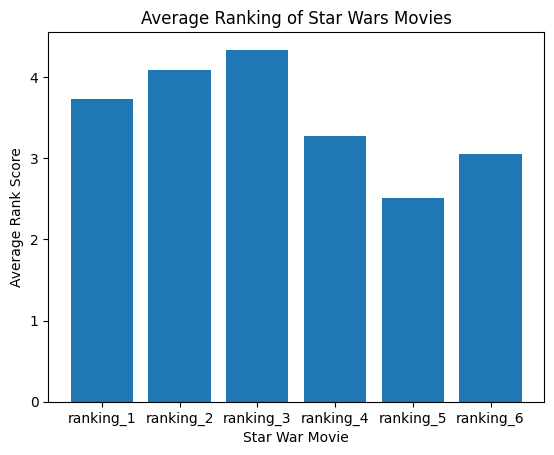

In [40]:
plt.bar(x=mean_rank.index,height=mean_rank)
plt.title('Average Ranking of Star Wars Movies')
plt.ylabel('Average Rank Score')
plt.xlabel('Star War Movie')

#### Finding Most Viewed Movie

In [41]:
num_seen = df.iloc[:,3:9].sum()
num_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

Text(0.5, 0, 'Star War Movie')

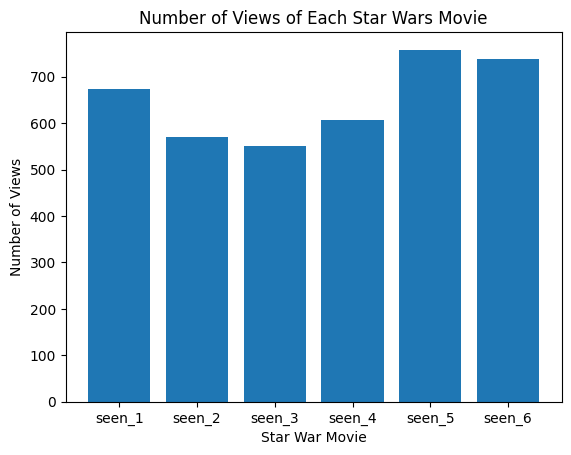

In [42]:
plt.bar(x=num_seen.index, height=num_seen)
plt.title('Number of Views of Each Star Wars Movie')
plt.ylabel('Number of Views')
plt.xlabel('Star War Movie')

#### Exploring the Data by Binary Segments <a class='anchor' id='6'></a>

We will explore the data of different groups ie gender and fans of the franchise.

In [43]:
gender = df[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6','Gender']].groupby('Gender').sum()
gender

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Gender,,,,,,
Female,298,237,222,255,353,338
Male,361,323,317,342,392,387


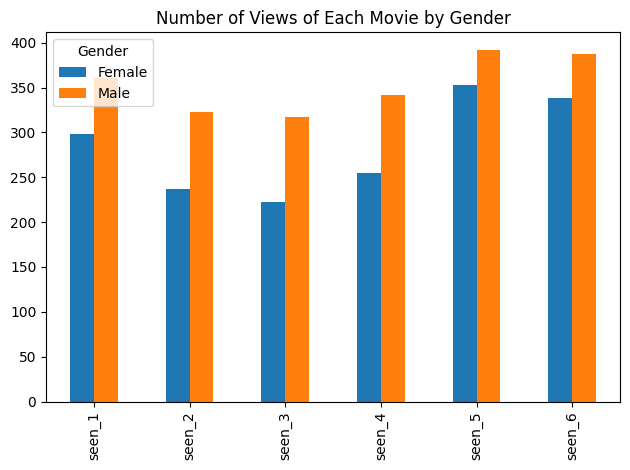

In [50]:
gender.T.plot.bar()
plt.title('Number of Views of Each Movie by Gender')
plt.tight_layout()
plt.show()

In [51]:
gender = df[['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6','Gender']].groupby('Gender').mean()
gender

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Gender,,,,,,
Female,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


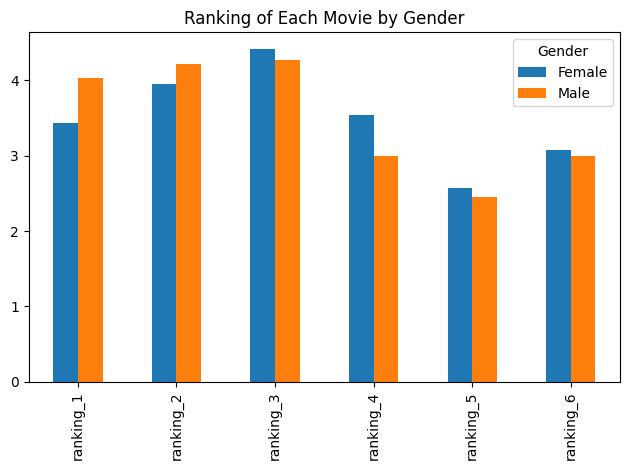

In [52]:
gender.T.plot.bar()
plt.title('Ranking of Each Movie by Gender')
plt.tight_layout()
plt.show()

In [45]:
fan = df[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6','Do you consider yourself to be a fan of the Star Wars film franchise?']].groupby('Do you consider yourself to be a fan of the Star Wars film franchise?').sum()
fan

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Do you consider yourself to be a fan of the Star Wars film franchise?,,,,,,
False,173,108,100,124,220,201
True,500,463,450,483,538,537


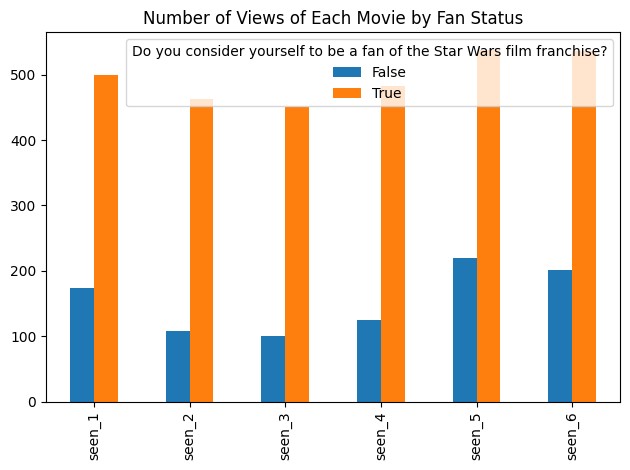

In [49]:
fan.T.plot.bar()
plt.title('Number of Views of Each Movie by Fan Status')
plt.tight_layout()
plt.show()

In [53]:
fan = df[['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6','Do you consider yourself to be a fan of the Star Wars film franchise?']].groupby('Do you consider yourself to be a fan of the Star Wars film franchise?').mean()
fan

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Do you consider yourself to be a fan of the Star Wars film franchise?,,,,,,
False,2.936396,3.591549,4.193662,3.933099,2.862676,3.471831
True,4.141304,4.342391,4.417423,2.932971,2.333333,2.829710


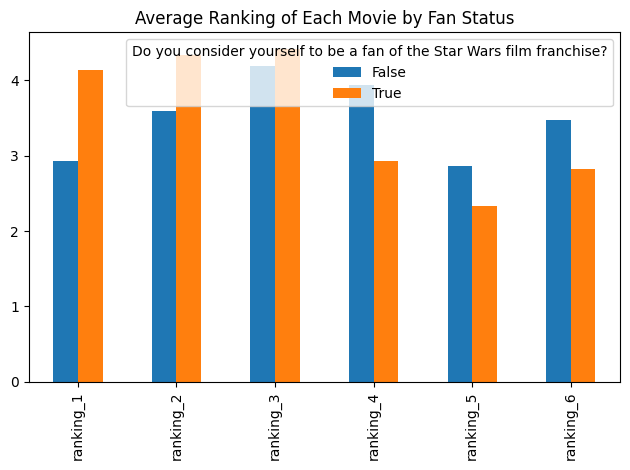

In [55]:
fan.T.plot.bar()
plt.title('Average Ranking of Each Movie by Fan Status')
plt.tight_layout()
plt.show()